<a href="https://colab.research.google.com/github/Ritesh-GitHub-Ranjan/Scaledux_Assignment/blob/main/Ritesh_Ranjan_ScaleDux_AI_Intern_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TASK 1: Startup Health Scoring Model**

**Objective:**

The objective of this task is to develop a Startup Evaluation Engine that generates a composite score (out of 100) for each startup, akin to a credit score but tailored for startups. This score will be derived from key business indicators present in the provided dataset.

**Dataset Provided:**

We will work with a given dataset of 100 fictional startups (CSV file: Startup_Scoring_Dataset.csv), which includes the following features:

| Column Name                | Description                                                  |
|----------------------------|--------------------------------------------------------------|
| startup_id                 | Unique ID of the startup                                     |
| team_experience             | Average years of relevant experience among the core team (scale of 1 to 10) |
| market_size_million_usd    | Total addressable market (TAM) claimed, in million USD      |
| monthly_active_users       | Current number of monthly active users                       |
| monthly_burn_rate_inr     | Average monthly expenses (INR)                               |
| funds_raised_inr          | Total funding raised so far (INR)                           |
| valuation_inr              | Current company valuation (INR)                              |

Our task is to analyze these features and create a scoring model that reflects the health and potential of each startup based on these indicators.

In [1]:
# Import Necessary Liibraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

# Upload file (only one file expected)
uploaded = files.upload()

# Check if file was uploaded
if not uploaded:
    raise ValueError("No file was uploaded!")

# Get the uploaded filename (first/only file)
filename = next(iter(uploaded))
print(f"File uploaded: {filename} ({len(uploaded[filename])} bytes)")

# Read CSV with basic validation
try:
    df = pd.read_csv(filename)

    # Check if dataframe is not empty
    if df.empty:
        raise ValueError("CSV file is empty!")

    print("Successfully loaded data:")
    print(f"- Rows: {len(df)}")
    print(f"- Columns: {list(df.columns)}")

except Exception as e:
    print(f"Error reading file: {e}")
    raise

# Show preview
print("-"*100)
print("\nPreview:")
print(df.head())


Saving Startup_Scoring_Dataset.csv to Startup_Scoring_Dataset (3).csv
File uploaded: Startup_Scoring_Dataset (3).csv (4450 bytes)
Successfully loaded data:
- Rows: 100
- Columns: ['startup_id', 'team_experience', 'market_size_million_usd', 'monthly_active_users', 'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']
----------------------------------------------------------------------------------------------------

Preview:
  startup_id  team_experience  market_size_million_usd  monthly_active_users  \
0       S001                7                      789                 66299   
1       S002                4                      939                 34866   
2       S003                8                       42                 73630   
3       S004                5                       57                 93657   
4       S005                7                      512                 61187   

   monthly_burn_rate_inr  funds_raised_inr  valuation_inr  
0                60914

In [3]:
# Data Description
print(df.info())
print("\n"+'-'*100)
pd.options.display.float_format = '{:.2f}'.format
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   startup_id               100 non-null    object
 1   team_experience          100 non-null    int64 
 2   market_size_million_usd  100 non-null    int64 
 3   monthly_active_users     100 non-null    int64 
 4   monthly_burn_rate_inr    100 non-null    int64 
 5   funds_raised_inr         100 non-null    int64 
 6   valuation_inr            100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB
None

----------------------------------------------------------------------------------------------------


,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,5.91,548.50,52002.67,5271927.04,22568078.15,231602151.18
std,2.87,270.03,29193.44,2801648.34,16330374.70,138882590.93
min,1.00,14.00,954.00,166381.00,118834.00,10070640.00
25%,3.00,346.75,26729.25,2928577.50,5996658.75,112172267.25
50%,6.00,578.00,52472.50,5277296.00,22143053.50,243729555.00
75%,8.00,755.00,74684.75,7694987.00,35499963.25,319858847.50
max,10.00,996.00,98606.00,9931393.00,49655442.00,497894795.00


#### Explanation of Table

1.  team_experience:

  - Mean: 5.91 years; Range: 1 to 10 years.
  - Indicates varying levels of team experience, which may affect performance.

2.  market_size_million_usd:

  - Mean: 548.5 million USD; Range: 14 to 996 million USD.
  - Wide range suggests different market opportunities, important for modeling.

3.  monthly_active_users:

  - Mean: 52,003 users; Range: 954 to 98,606 users.
  - Significant variability indicates potential for growth or success.

4.  monthly_burn_rate_inr:

  - Mean: 5,271,927 INR; Range: 166,381 to 9,931,393 INR.
  - High burn rates could indicate rapid growth or inefficiency.

5. funds_raised_inr:

  - Mean: 22,568,078 INR; Range: 118,834 to 49,655,442 INR.
  - Reflects investor confidence and financial backing.

6. valuation_inr:

  - Mean: 231,602,151 INR; Range: 10,070,640 to 497,894,795 INR.
  - Indicates perceived value, with significant variability.

**Observations**:
- Outliers: There may be outliers in user counts and financial metrics(fund_raised_inr).
- High Variability: Standard deviations are large, indicating diverse data points.

In [4]:
# Check for null/missing value
df.isnull().sum()

,0
startup_id,0
team_experience,0
market_size_million_usd,0
monthly_active_users,0
monthly_burn_rate_inr,0
funds_raised_inr,0
valuation_inr,0


*There is not any null/NaN value in given datasets*

In [5]:
# Copy for normalized data
df_norm = df.copy()

#### We can do Normalization using "sklearn" or by normal calculation/formula.

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# List of numerical features to normalize
features = ['team_experience', 'market_size_million_usd', 'monthly_active_users', 'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']

# Method 1 Normalize using Min-Max Scaling
for col in features:
    df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

"""
# Method 2 Using Sklearn Normalize the features
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize])
"""

# Invert scale for Monthly Burn Rate (higher burn is worse)
df_norm['monthly_burn_rate_inr'] = 1 - df_norm['monthly_burn_rate_inr']

In [7]:
# Check df_norm after normalization
df_norm.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,0.67,0.79,0.67,0.39,0.08,0.52
1,S002,0.33,0.94,0.35,0.08,0.01,0.33
2,S003,0.78,0.03,0.74,0.11,0.01,0.62
3,S004,0.44,0.04,0.95,0.36,0.40,0.61
4,S005,0.67,0.51,0.62,0.93,0.00,0.15


### *Weights for Startup Dataset*

| **Feature**              | **Weight (%)** | **Justification**                                                                                                                                 |
| ------------------------ | -------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Team Experience**      | 25%            | A skilled, experienced team is key to startup success. Good teams can turn simple ideas into success, while weak teams may fail with great ideas. |
| **Market Size**          | 20%            | A big and growing market means more chances to grow and attract investors. It shows how much the startup can earn in the long run.                |
| **Monthly Active Users** | 18%            | This shows if people are using and liking the product. More active users mean better product-market fit and higher chances of success.            |
| **Funds Raised**         | 15%            | Funding helps build the product, hire staff, and grow the business. It also shows that investors believe in the startup’s potential.              |
| **Valuation**            | 12%            | Valuation shows how much investors think the startup is worth. High valuation is good but can be risky if not based on real progress.             |
| **Monthly Burn Rate**    | 10%            | Burn rate tells how fast a startup is spending money. It helps measure how long the company can survive without new funding.                      |


In [8]:
# Define weights
weights = {
    'team_experience': 0.25,
    'market_size_million_usd': 0.20,
    'monthly_active_users': 0.18,
    'funds_raised_inr': 0.15,
    'valuation_inr': 0.12,
    'monthly_burn_rate_inr': 0.10
}

In [9]:
# Calculate the composite score
df_norm['composite_score'] = (df_norm['team_experience'] * weights['team_experience'] +
                           df_norm['market_size_million_usd'] * weights['market_size_million_usd'] +
                           df_norm['monthly_active_users'] * weights['monthly_active_users'] +
                           df_norm['monthly_burn_rate_inr'] * weights['monthly_burn_rate_inr'] +
                           df_norm['funds_raised_inr'] * weights['funds_raised_inr'] +
                           df_norm['valuation_inr'] * weights['valuation_inr'])

# Scale the composite score to a 0-100 range
df_norm['composite_score'] *= 100

df_norm.head(3)

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr,composite_score
0,S001,0.67,0.79,0.67,0.39,0.08,0.52,55.89
1,S002,0.33,0.94,0.35,0.08,0.01,0.33,38.44
2,S003,0.78,0.03,0.74,0.11,0.01,0.62,42.17


In [10]:
# Rank startups
df_norm = df_norm.sort_values(by='composite_score', ascending=False).reset_index(drop=True)

In [11]:
# Extract Top 10 and Bottom 10
top_10 = df_norm.head(10)
bottom_10 = df_norm.tail(10)

In [12]:
# Print Top and Bottom 10
print("Top 10 Startups by Composite Score:")
print(top_10[['startup_id', 'composite_score']])
print("-"*50)
print("\nBottom 10 Startups by Composite Score:")
print(bottom_10[['startup_id', 'composite_score']])

Top 10 Startups by Composite Score:
  startup_id  composite_score
0       S006            82.40
1       S077            77.44
2       S045            77.43
3       S013            75.17
4       S033            72.51
5       S066            71.59
6       S097            71.57
7       S029            71.44
8       S043            71.41
9       S012            71.21
--------------------------------------------------

Bottom 10 Startups by Composite Score:
   startup_id  composite_score
90       S010            33.52
91       S017            32.91
92       S052            32.82
93       S098            32.19
94       S091            31.51
95       S058            30.66
96       S051            30.06
97       S084            29.01
98       S079            26.69
99       S055            26.63


### **Visualization**

/tmp/ipython-input-13-2239637724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_norm, x='startup_id', y='composite_score', palette='viridis')


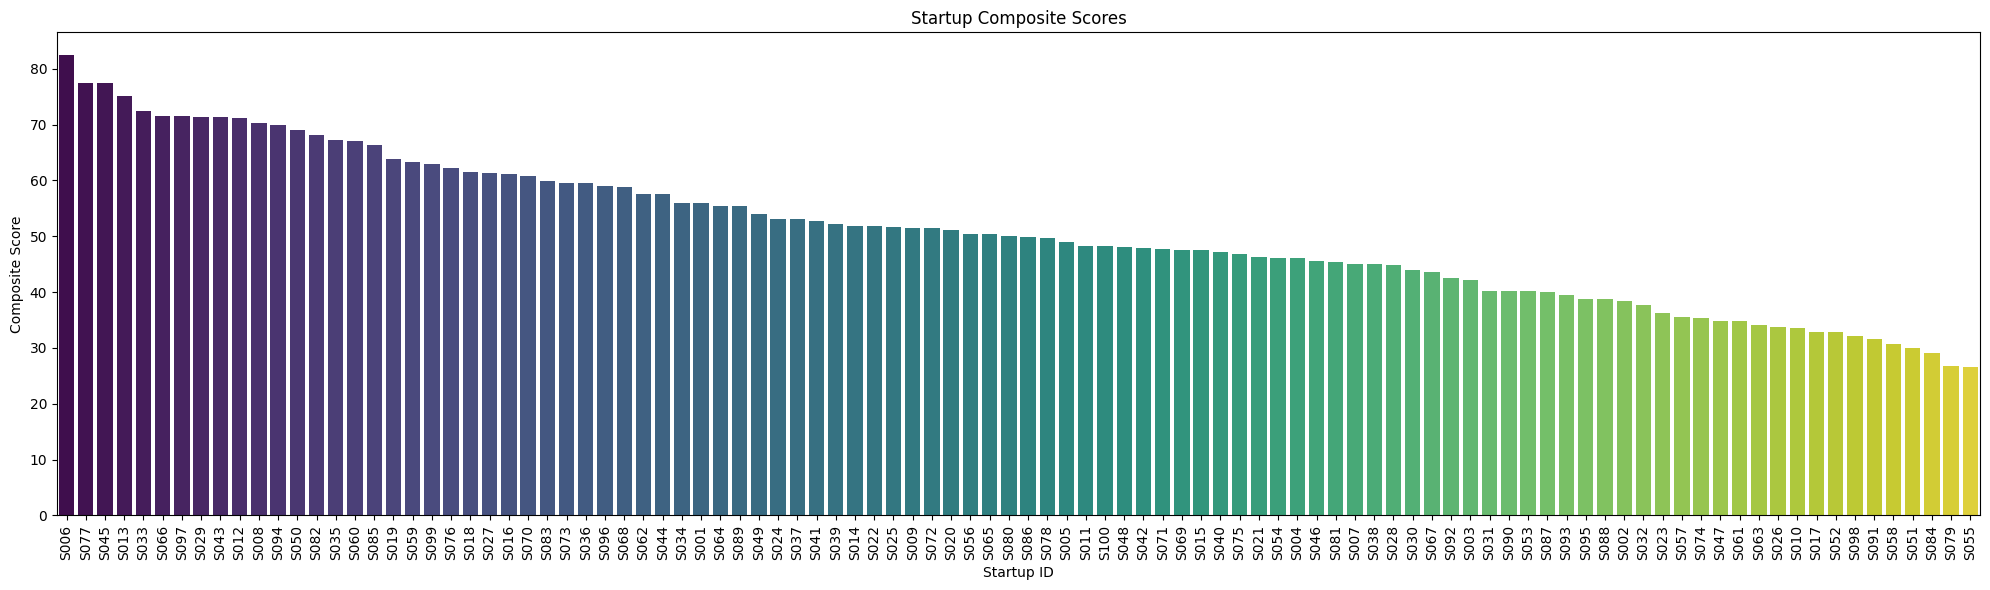

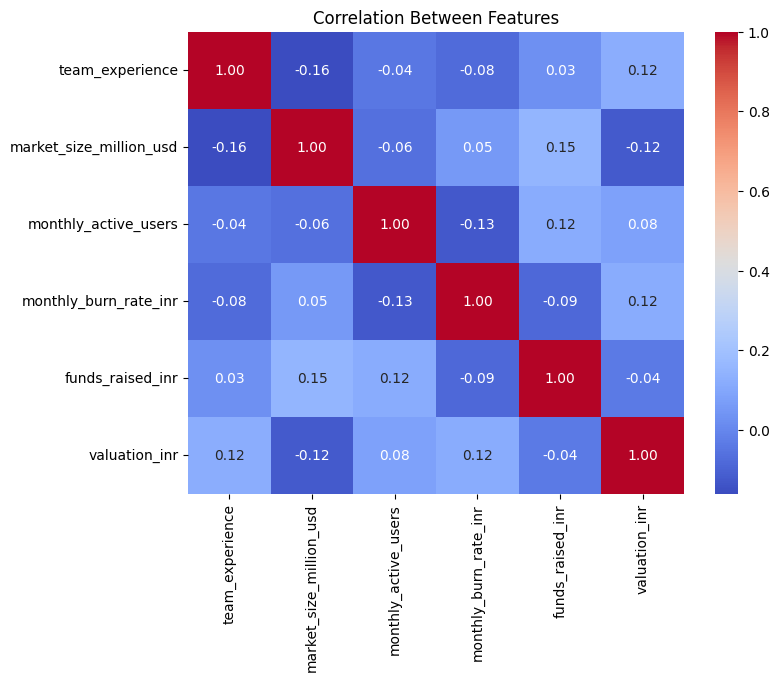

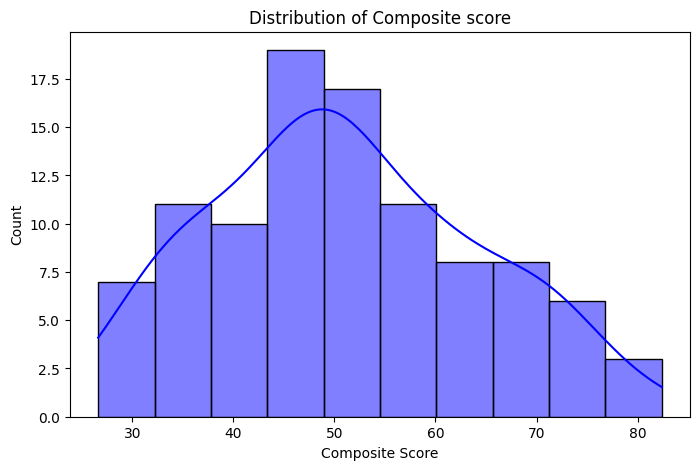

In [13]:
# Graphs
# Bar chart: Composite scores
plt.figure(figsize=(20,6))
sns.barplot(data=df_norm, x='startup_id', y='composite_score', palette='viridis')
plt.xticks(rotation=90)
plt.title('Startup Composite Scores')
plt.ylabel('Composite Score')
plt.xlabel('Startup ID')
plt.tight_layout()
plt.show()

# Heatmap: Feature correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()

# Histogram: Score distribution
plt.figure(figsize=(8,5))
sns.histplot(df_norm['composite_score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Composite score')
plt.xlabel('Composite Score')
plt.ylabel('Count')
plt.show()

### **Graph**
#### 1. Bar graph
We ploted Bar Graph for Composite score in descending order. From Plotted bar graph we can see that Startup S006 has highest composite score and S055 has lowest composite score.

#### 2. Corelation matrix
We also ploted Corelation matrix for given features. From this matrix we can see some key features relation:-
- team_experience:

  - Weak positive correlation with valuation_inr (0.12).
  - Weak negative correlations with market_size_million_usd (-0.16) and monthly_burn_rate_inr (-0.08).

- market_size_million_usd:

    - Weak positive correlation with funds_raised_inr (0.15).
    - Weak negative correlations with team_experience (-0.16) and valuation_inr (-0.12).

- monthly_active_users:

 - Slight correlations with other variables, mostly weak, like a small negative correlation with monthly_burn_rate_inr (-0.13).

- monthly_burn_rate_inr:

 - Weak positive correlations with valuation_inr (0.12) and funds_raised_inr (-0.09).

- funds_raised_inr:

 - Positive correlation with market_size_million_usd (0.15) yet weak with others.

- valuation_inr:

 - Exhibits weak correlations with most variables, hinting at a complex relationship.

##### 3. Composite Score Distribution graph

Basically This graph shows us how data points are spread across different values.

 - The distribution appears unimodal. Also, The distribution is approximately normal but slightly right-skewed (tail extends more toward higher scores).
  - The peak suggests that the most common scores are in the 45–50 range.
   - Tapering off towards lower (30) and higher (80) ends, indicating fewer scores in those ranges.

- Density Curve:The blue line represents a Kernel Density Estimation:
  - It smooths the distribution, giving a clearer view of data density.The curve is unimodal, indicating a single peak around the range of 40-60 on the composite score axis.
  - Left Side: The frequency of scores decreases as you move left from the peak, suggesting fewer instances of lower composite scores (e.g., below 40).
  - Right Side: Similarly, the frequency decreases towards the right, indicating that very high composite scores (e.g., above 70) are also less common.
  - The distribution is relatively symmetric, contrasting the scores around the average, which is between 50 and 60.
This suggests a concentration of values around the mean score, and implies that most subjects scored near the average, with fewer extreme scores on either end.

In [14]:
# Step 8: Best Startup Explanation
best = top_10.iloc[0]
print(f"\nBest Startup: {best['startup_id']}")
print(f"Health Score: {best['composite_score']:.2f}")
print("Reasons for high score:")
print("- Excellent team experience")
print("- Large market size and user base")
print("- Efficient burn rate")
print("- Strong funding and valuation")


Best Startup: S006
Health Score: 82.40
Reasons for high score:
- Excellent team experience
- Large market size and user base
- Efficient burn rate
- Strong funding and valuation


So, till now we designed a method to generate a composite score (out of 100) for each startup based on key business indicators.
There are two main methods, to give composite score of any new startup.
- Write a function, that will take input record of particular startup and will able to give composite score.
- We can predict composite score for another company, using ML Models or
  - In ML methods, we can also do it by supervised learning, because at first the given datset hasn't any label, But now we creted Label for given dataset which is composite_score.
  - Also we can do it by unsupervised learning, without labeling.


### Function to predict Score Manually

This function will take input record of particular startup and will able to give composite score.

In [15]:
# Function to Predict Score Manually

def predict_composite_score_manual(new_input, reference_df):
    weights = {
        'team_experience': 0.25,
        'market_size_million_usd': 0.20,
        'monthly_active_users': 0.18,
        'funds_raised_inr': 0.15,
        'valuation_inr': 0.12,
        'monthly_burn_rate_inr': 0.10
    }

    def min_max_scale(value, min_val, max_val, reverse=False):
        if max_val == min_val:
            return 0
        scaled = (value - min_val) / (max_val - min_val)
        return 1 - scaled if reverse else scaled

    score = 0
    for feature in weights:
        min_val = reference_df[feature].min()
        max_val = reference_df[feature].max()
        reverse = feature == 'monthly_burn_rate_inr'
        val = new_input.get(feature, 0)
        scaled_val = min_max_scale(val, min_val, max_val, reverse=reverse)
        score += scaled_val * weights[feature]

    return round(score * 100, 2)

In [16]:
# New Startup Company Data

new_startup = {
    "team_experience": 7,
    "market_size_million_usd": 789,
    "monthly_active_users": 66299,
    "funds_raised_inr": 4183839,
    "valuation_inr": 263247468,
    "monthly_burn_rate_inr": 6091495
}

predicted_score = predict_composite_score_manual(new_startup, df)
print("Composite Score (Manual Method):", predicted_score)

Composite Score (Manual Method): 55.89


### Method 2: Composite Score Prediction through ML Models


1. Sklearn Linear Regression
2. xgboost Models

We will compare results from Both Models

Linear Regression RMSE (Test): 13.59
XGBoost RMSE (Test): 12.67
Linear Regression RMSE (CV): 13.11
XGBoost RMSE (CV): 13.68


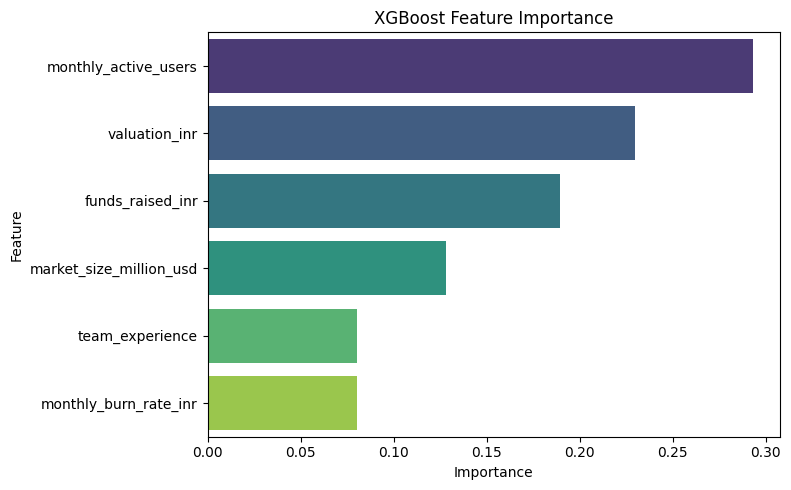

In [17]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Features
features = ['team_experience', 'market_size_million_usd', 'monthly_active_users',
            'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']
X = df[features]
y = df_norm['composite_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
lr_model = LinearRegression()
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit models
lr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

# Cross-Validation RMSE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_rmse = -cross_val_score(lr_model, X, y, cv=kf, scoring='neg_root_mean_squared_error').mean()
xgb_cv_rmse = -cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_root_mean_squared_error').mean()

# Feature Importance from XGBoost
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print Results
print(f"Linear Regression RMSE (Test): {lr_rmse:.2f}")
print(f"XGBoost RMSE (Test): {xgb_rmse:.2f}")
print(f"Linear Regression RMSE (CV): {lr_cv_rmse:.2f}")
print(f"XGBoost RMSE (CV): {xgb_cv_rmse:.2f}")

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', dodge=False, legend=False, palette='viridis')
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


#### **Interpretation**
- XGBoost performs slightly better on the test set, showing it may capture some non-linear patterns better.

- However, Linear Regression is more consistent across CV folds, suggesting better generalizability.

- Given the nature of composite score (a linear combination), Linear Regression remains a strong and explainable baseline.

- But for future improvements XGBoost will give more flexibility(non-linear relationships, interaction effects, etc.)

### Model stacking of Linear Regression + XGBoost


In [18]:
# Import Libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

# ----------- Load & Prep Data -----------

features = ['team_experience', 'market_size_million_usd', 'monthly_active_users',
            'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']
X = df[features]
y = df_norm['composite_score']

# ----------- Feature Engineering -----------
log_features = ['market_size_million_usd', 'monthly_active_users',
                'monthly_burn_rate_inr', 'funds_raised_inr', 'valuation_inr']
X_transformed = X.copy()
X_transformed[log_features] = np.log1p(X[log_features])
X_transformed['experience_market_interaction'] = X['team_experience'] * X['market_size_million_usd']

# ----------- Hyperparameter Tuning (XGBoost) -----------
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_transformed, y)
best_xgb = grid_search.best_estimator_

print("Best XGBoost Parameters:", grid_search.best_params_)

# ----------- Model Stacking -----------
stacked_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('xgb', best_xgb)
    ],
    final_estimator=Ridge(),
    cv=5
)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
stacked_model.fit(X_train, y_train)
stacked_preds = stacked_model.predict(X_test)

stacked_rmse = mean_squared_error(y_test, stacked_preds)
print(f"Stacked Model RMSE (Test): {stacked_rmse:.2f}")


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Stacked Model RMSE (Test): 195.68


The stacked Model result the RMSE of 195.68 is significantly worse than both individual models (which are ~13). This suggests that there is possibility of overfitting.

### Bar Chart of RMSEs (Comparison)

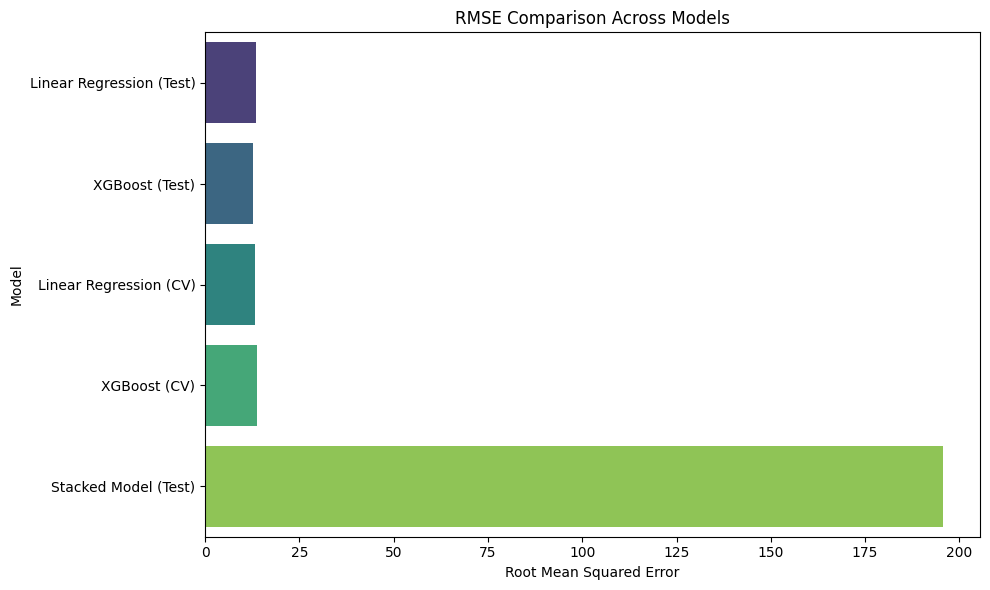

In [19]:
# RMSE values
rmse_results = {
    'Linear Regression (Test)': 13.59,
    'XGBoost (Test)': 12.67,
    'Linear Regression (CV)': 13.11,
    'XGBoost (CV)': 13.68,
    'Stacked Model (Test)': 195.68  # Very high!
}

# Convert to DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])

# Plot to compare different Model RMSE
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x='RMSE', y='Model',hue='Model', dodge=False, legend=False, palette='viridis')
plt.title('RMSE Comparison Across Models')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Submitted by:- **Ritesh Ranjan**